In [9]:
library(dplyr)
library(ggplot2)
library(readr)
library(magrittr)
require(tidyr)
require(dplyr)
require(lazyeval)

In [15]:
d_upper <- read_delim('dfe_outfile_upper10th_chlamynet_betweenness_centrality.csv', delim = ' ', col_names = FALSE);
d_lower <- read_delim('dfe_outfile_lower10th_chlamynet_betweenness_centrality.csv', delim = ' ', col_names = FALSE);
dim(d_upper); dim(d_lower);

head(d_upper); head(d_lower)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_double(),
  X13 = col_logical()
)
Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_double(),
  X13 = col_logical()
)


[1] 100  13

[1] 100  13

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
0,1,0.171262,1,10,0.065417,10,100,0.090397,100,-99,0.672924,NA
0,1,0.236810,1,10,0.050996,10,100,0.061978,100,-99,0.650216,NA
0,1,0.212262,1,10,0.042757,10,100,0.051369,100,-99,0.693612,NA
0,1,0.229608,1,10,0.071822,10,100,0.094280,100,-99,0.604290,NA
0,1,0.226238,1,10,0.054348,10,100,0.067403,100,-99,0.652010,NA
0,1,0.183967,1,10,0.043145,10,100,0.053264,100,-99,0.719624,NA


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
0,1,0.257502,1,10,0.040062,10,100,0.046295,100,-99,0.656141,NA
0,1,0.219240,1,10,0.078349,10,100,0.106323,100,-99,0.596088,NA
0,1,0.200475,1,10,0.059637,10,100,0.077376,100,-99,0.662512,NA
0,1,0.255076,1,10,0.031124,10,100,0.034922,100,-99,0.678879,NA
0,1,0.216372,1,10,0.042808,10,100,0.051277,100,-99,0.689543,NA
0,1,0.211890,1,10,0.048192,10,100,0.059153,100,-99,0.680765,NA


In [16]:
library(purrr)

In [17]:
dfe <- lapply(ls(pattern = 'd*r'), get)
names(dfe) <- ls(pattern = 'd*r')

In [18]:
lapply(dfe, function(df) head(df))

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
0,1,0.257502,1,10,0.040062,10,100,0.046295,100,-99,0.656141,NA
0,1,0.219240,1,10,0.078349,10,100,0.106323,100,-99,0.596088,NA
0,1,0.200475,1,10,0.059637,10,100,0.077376,100,-99,0.662512,NA
0,1,0.255076,1,10,0.031124,10,100,0.034922,100,-99,0.678879,NA
0,1,0.216372,1,10,0.042808,10,100,0.051277,100,-99,0.689543,NA
0,1,0.211890,1,10,0.048192,10,100,0.059153,100,-99,0.680765,NA
X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
0,1,0.171262,1,10,0.065417,10,100,0.090397,100,-99,0.672924,NA


In [19]:
dfe %<>% 
    lapply(function(df) select(df, group_1 = X3, group_2 = X6, group_3 = X9, group_4 = X12))
        
lapply(dfe, function(df) head(df))       

group_1,group_2,group_3,group_4
<dbl>,<dbl>,<dbl>,<dbl>
0.257502,0.040062,0.046295,0.656141
0.219240,0.078349,0.106323,0.596088
0.200475,0.059637,0.077376,0.662512
0.255076,0.031124,0.034922,0.678879
0.216372,0.042808,0.051277,0.689543
0.211890,0.048192,0.059153,0.680765
group_1,group_2,group_3,group_4
<dbl>,<dbl>,<dbl>,<dbl>
0.171262,0.065417,0.090397,0.672924


In [20]:
dfe_full <- reduce(dfe, bind_cols)

head(dfe_full)

group_1,group_2,group_3,group_4,group_11,group_21,group_31,group_41
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.257502,0.040062,0.046295,0.656141,0.171262,0.065417,0.090397,0.672924
0.219240,0.078349,0.106323,0.596088,0.236810,0.050996,0.061978,0.650216
0.200475,0.059637,0.077376,0.662512,0.212262,0.042757,0.051369,0.693612
0.255076,0.031124,0.034922,0.678879,0.229608,0.071822,0.094280,0.604290
0.216372,0.042808,0.051277,0.689543,0.226238,0.054348,0.067403,0.652010
0.211890,0.048192,0.059153,0.680765,0.183967,0.043145,0.053264,0.719624


In [21]:
dfe_full %<>% rename('0-1 lower' = group_1, '1-10 lower' = group_2, '10-100 lower' = group_3, '100-inf lower' = group_4,
                    '0-1 upper' = group_11, '1-10 upper' = group_21, '10-100 upper' = group_31, '100-inf upper' = group_41)

head(dfe_full)

0-1 lower,1-10 lower,10-100 lower,100-inf lower,0-1 upper,1-10 upper,10-100 upper,100-inf upper
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.257502,0.040062,0.046295,0.656141,0.171262,0.065417,0.090397,0.672924
0.219240,0.078349,0.106323,0.596088,0.236810,0.050996,0.061978,0.650216
0.200475,0.059637,0.077376,0.662512,0.212262,0.042757,0.051369,0.693612
0.255076,0.031124,0.034922,0.678879,0.229608,0.071822,0.094280,0.604290
0.216372,0.042808,0.051277,0.689543,0.226238,0.054348,0.067403,0.652010
0.211890,0.048192,0.059153,0.680765,0.183967,0.043145,0.053264,0.719624


In [22]:
dfe_full %<>%
    gather(group, value)

head(dfe_full)

group,value
<chr>,<dbl>
0-1 lower,0.257502
0-1 lower,0.219240
0-1 lower,0.200475
0-1 lower,0.255076
0-1 lower,0.216372
0-1 lower,0.211890


In [23]:
dfe_full_cis <- dfe_full %>%
    group_by(group) %>%
    summarise(group_mean = mean(value), group_sd = sd(value), group_n = n()) %>%
    mutate(error = qt(0.975, df = (group_n - 1)) * ((group_sd) / sqrt(group_n))) %>%
    mutate(error_left = group_mean - error, error_right = group_mean + error) %>%
    separate(group, c('range', 'type_of'), sep = ' ') %>%
    mutate(type_of = case_when(type_of == 'lower' ~ 'bottom 10%', type_of == 'upper' ~ 'top 10%'))

dfe_full_cis

range,type_of,group_mean,group_sd,group_n,error,error_left,error_right
<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0-1,bottom 10%,0.22419544,0.02349012,100,0.004660949,0.21953449,0.22885639
0-1,top 10%,0.20790384,0.02000896,100,0.003970212,0.20393363,0.21187405
1-10,bottom 10%,0.05473978,0.01717700,100,0.003408290,0.05133149,0.05814807
1-10,top 10%,0.05694663,0.01637783,100,0.003249717,0.05369691,0.06019635
10-100,bottom 10%,0.06980032,0.02650443,100,0.005259054,0.06454127,0.07505937
10-100,top 10%,0.07401335,0.02644696,100,0.005247650,0.06876570,0.07926100
100-inf,bottom 10%,0.65126447,0.04344254,100,0.008619943,0.64264453,0.65988441
100-inf,top 10%,0.66113623,0.04523183,100,0.008974977,0.65216125,0.67011121


In [24]:
dfe_full_cis$range[1]

[1] "0-1"

In [25]:
my.plot<-ggplot(dfe_full_cis, aes(x = factor(range), y = group_mean, fill = factor(type_of))) + 
geom_bar(stat = 'identity', position = 'dodge') +
geom_errorbar(aes(ymin = error_left, ymax = error_right), position = position_dodge(1), width = 0.3, size = 0.3) +
theme_linedraw() +
scale_fill_brewer(palette = 4, direction = 1) +
# scale_fill_manual(values=c("#999999", "#E69F00", "#56B4E9")) +
xlab(expression(paste(N[e], 's'))) +
ylab('proportion of mutations') +
theme(panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      axis.text = element_text(size = 14),
      axis.title = element_text(size = 14)) +
theme(legend.position = c(0.23, 0.8)) +
guides(fill = guide_legend(title = "chlamynet-bc type")) +
coord_cartesian(y = c(0, 1))
# ggsave(plot=my.plot, "high_bw_connectivity_props.png")

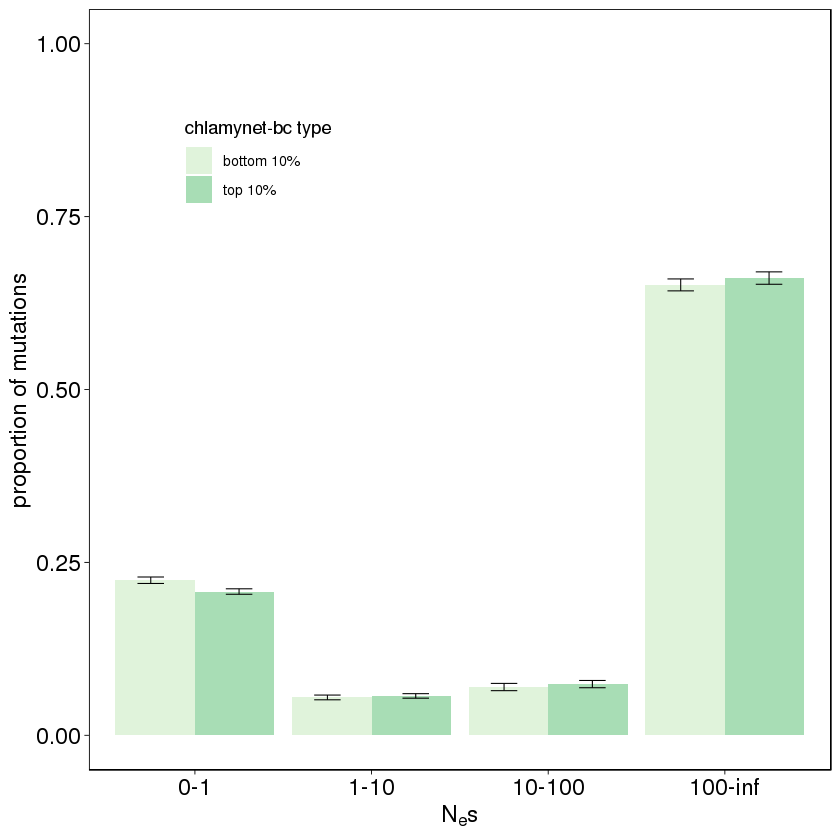

In [26]:
my.plot

from https://www.cyclismo.org/tutorial/R/confidence.html

> mean <- 5
> sd <- 2
> sample size <- 20
> error <- qt(0.975,df=n-1)*s/sqrt(n)
> left <- a-error
> right <- a+error
> left
[1] 4.063971
> right
[1] 5.936029